In [298]:
###CC1 Machine Learning AARAB_Ayoub


#Objectif : Construction des modèles de la classification pour prédire si un patient fume ou non en utilisant un Dataset d'assurance

In [299]:
#Partie 1 : Pretraitement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
#1 charger les données
df = pd.read_csv("insuranceCC1.csv")
df = df.dropna(how='all')

# Pour la colonne 'region' (catégorielle), remplacer les valeurs manquantes par la valeur la plus fréquente
df['region'] = df['region'].fillna(df['region'].mode()[0])

# Pour la colonne 'charges' (numérique), remplacer les valeurs manquantes par la moyenne
df['charges'] = df['charges'].fillna(df['charges'].mean())


df.head()
# print(df.info())

,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.900,1.0,yes,Martil,16884.92400
1,18.0,male,33.770,1.0,no,Martil,1725.55230
2,28.0,male,NaN,3.0,no,Martil,4449.46200
3,33.0,male,22.705,NaN,no,Martil,21984.47061
4,32.0,male,28.880,0.0,no,Martil,3866.85520


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [302]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50.0,male,30.97,3.0,no,Martil,10600.548300
1334,18.0,female,31.92,0.0,no,Martil,2205.980800
1335,18.0,female,36.85,0.0,no,Martil,1629.833500
1336,21.0,female,25.80,0.0,no,Martil,2007.945000
1337,61.0,female,29.07,0.0,yes,Martil,13258.551706


In [303]:
# Gerer les valeurs manquantes
print(df.isnull().sum())

age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     0
dtype: int64


In [304]:
df.shape

(1338, 7)

In [305]:
df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [306]:
from sklearn.impute import SimpleImputer

# Pour les colonnes numériques
imputer_mean = SimpleImputer(strategy='mean')
df['age'] = imputer_mean.fit_transform(df[['age']])
df['bmi'] = imputer_mean.fit_transform(df[['bmi']])

# Pour les colonnes discrètes/catégorielles
imputer_freq = SimpleImputer(strategy='most_frequent')
df['children'] = imputer_freq.fit_transform(df[['children']])

In [307]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

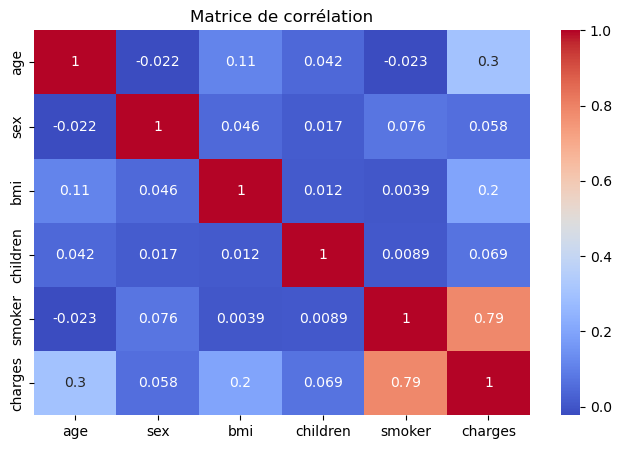

In [308]:
# Supprimer la colonne 'region' qui est non numérique et inutile
# la colonne region contient uniquement la valeur "Martil" pour tous les patients.
# Une colonne qui a la même valeur partout n’apporte aucune information pour la classification, donc on la supprime.
df = df.drop(columns=['region'])

corr = df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()



In [309]:
# Suppression des features les moins corrélées à 'smoker'
low_corr = corr['smoker'].abs().sort_values()

features_to_drop = low_corr[low_corr < 0.05].index.tolist()

features_to_drop = [f for f in features_to_drop if f != 'smoker']

df = df.drop(columns=features_to_drop)

print("Features supprimées :", features_to_drop)

Features supprimées : ['bmi', 'children', 'age']


   sex  smoker      charges
0    0       1  16884.92400
1    1       0   1725.55230
2    1       0   4449.46200
3    1       0  21984.47061
4    1       0   3866.85520


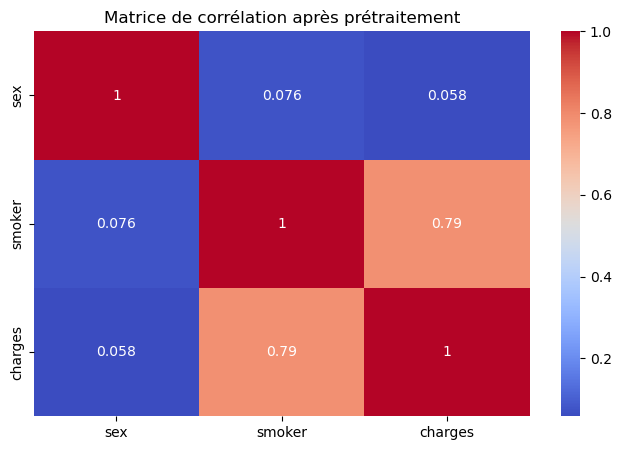

In [310]:
# Afficher les données après le prétraitement
print(df.head())
# heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation après prétraitement")
plt.show()

In [311]:
# Partie 2 : Classification et comparaison des modèles

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [312]:
# Séparer X et y
X = df.drop(columns=['smoker'])
y = df['smoker']


In [313]:

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [314]:
#Dimensions du Dataset
print(f' Dimensions de X_train : {X_train.shape}')
print(f' Dimensions de y_train : {y_train.shape}')
print(f' Dimensions de X_test : {X_test.shape}')
print(f' Dimensions de y_test : {y_test.shape}')

 Dimensions de X_train : (936, 2)
 Dimensions de y_train : (936,)
 Dimensions de X_test : (402, 2)
 Dimensions de y_test : (402,)


In [315]:

# 3. Normalisation (important pour SVM et régression logistique)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [316]:
X_train

array([[-1.02597835,  0.00552845],
       [ 0.97467943,  0.9296551 ],
       [-1.02597835,  1.1545818 ],
       ...,
       [ 0.97467943, -0.11835351],
       [-1.02597835,  2.70863924],
       [ 0.97467943, -0.26031267]], shape=(936, 2))

In [317]:
X_test

array([[-1.02597835e+00, -3.52904507e-01],
       [-1.02597835e+00, -6.69069954e-01],
       [-1.02597835e+00,  1.32067045e+00],
       [ 9.74679434e-01, -3.35799393e-01],
       [ 9.74679434e-01,  1.68616143e+00],
       [ 9.74679434e-01, -7.29932630e-01],
       [-1.02597835e+00, -9.29985071e-01],
       [ 9.74679434e-01,  7.01610510e-02],
       [-1.02597835e+00, -7.96395726e-01],
       [ 9.74679434e-01, -2.56193546e-01],
       [ 9.74679434e-01,  4.04999855e-01],
       [ 9.74679434e-01, -5.04941538e-01],
       [-1.02597835e+00, -7.78632071e-01],
       [ 9.74679434e-01,  2.71175000e+00],
       [ 9.74679434e-01,  2.92036339e+00],
       [ 9.74679434e-01,  2.55060521e+00],
       [-1.02597835e+00, -2.94530938e-01],
       [-1.02597835e+00,  2.44864863e+00],
       [-1.02597835e+00, -4.24192248e-01],
       [-1.02597835e+00,  6.95710389e-01],
       [ 9.74679434e-01, -6.84955568e-01],
       [ 9.74679434e-01, -4.89659814e-01],
       [ 9.74679434e-01, -1.00119582e+00],
       [-1.

In [318]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression - Accuracy: 0.9129353233830846
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       323
           1       0.82      0.71      0.76        79

    accuracy                           0.91       402
   macro avg       0.88      0.84      0.85       402
weighted avg       0.91      0.91      0.91       402



In [319]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.9228855721393034
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       323
           1       0.82      0.77      0.80        79

    accuracy                           0.92       402
   macro avg       0.88      0.87      0.87       402
weighted avg       0.92      0.92      0.92       402



In [320]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM - Accuracy: 0.9303482587064676
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       323
           1       0.79      0.87      0.83        79

    accuracy                           0.93       402
   macro avg       0.88      0.91      0.89       402
weighted avg       0.93      0.93      0.93       402



In [321]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN - Accuracy: 0.9353233830845771
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       323
           1       0.82      0.86      0.84        79

    accuracy                           0.94       402
   macro avg       0.89      0.91      0.90       402
weighted avg       0.94      0.94      0.94       402



In [322]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree - Accuracy: 0.9154228855721394
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       323
           1       0.80      0.76      0.78        79

    accuracy                           0.92       402
   macro avg       0.87      0.86      0.86       402
weighted avg       0.91      0.92      0.91       402



In [323]:

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting - Accuracy: 0.9328358208955224
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       323
           1       0.82      0.85      0.83        79

    accuracy                           0.93       402
   macro avg       0.89      0.90      0.90       402
weighted avg       0.93      0.93      0.93       402

